In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

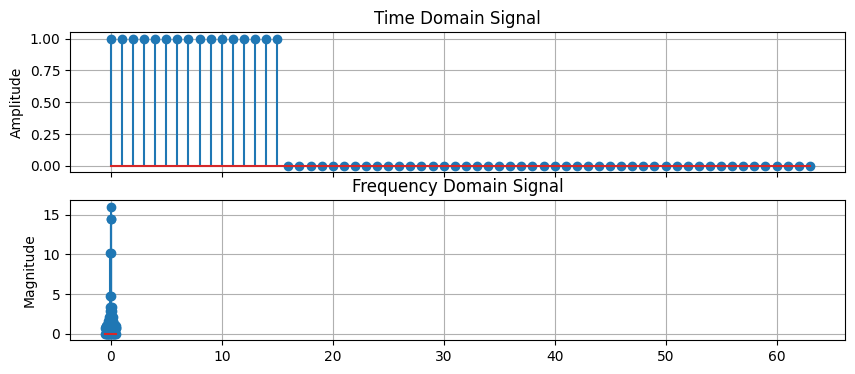

In [2]:
N = 64
t = np.arange(N)
st = np.concatenate((np.ones(N * 1 // 4), np.zeros(N * 3 // 4)))
f = np.fft.fftshift(np.fft.fftfreq(N))  # d=1 means Ts=1
Sf = fft.fftshift(fft.fft(st))

fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

axs[0].stem(t, st)
axs[0].set_title("Time Domain Signal")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

axs[1].stem(f, np.abs(Sf))
axs[1].set_title("Frequency Domain Signal")
axs[1].set_ylabel("Magnitude")
axs[1].grid()

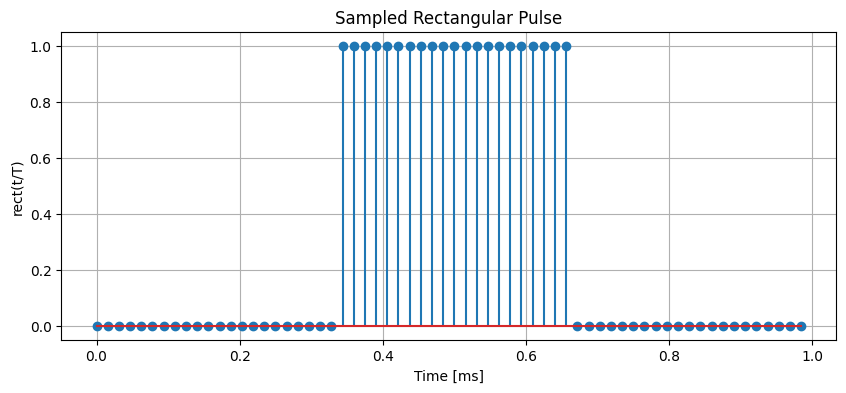

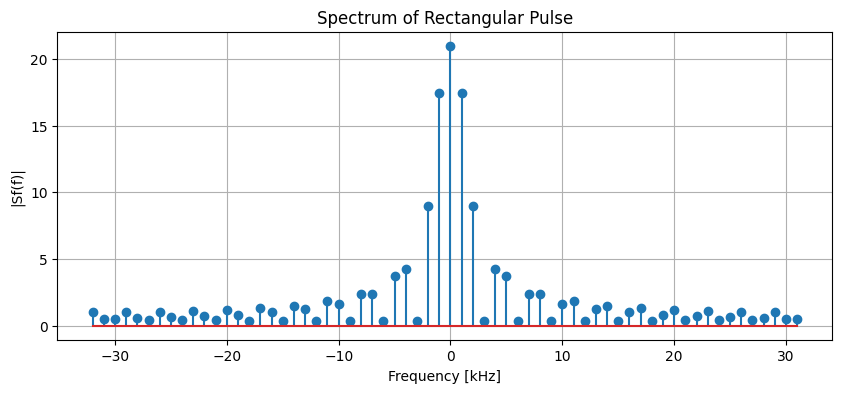

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 32e-5  # pulse width in seconds (example: 12 ms)
fs = 64e3  # sampling frequency in Hz
N = 64  # total number of samples

Ts = 1 / fs
t = np.arange(N) * Ts  # time axis in seconds

st = np.where(np.abs(t - (N * Ts) / 2) < T / 2, 1.0, 0.0)

Sf = np.fft.fftshift(np.fft.fft(st))

# frequency vector in Hz
f = np.fft.fftshift(np.fft.fftfreq(N, Ts))

# Time-domain pulse
plt.figure(figsize=(10, 4))
plt.stem(t * 1e3, st)  # scale time to ms
plt.xlabel("Time [ms]")
plt.ylabel("rect(t/T)")
plt.title("Sampled Rectangular Pulse")
plt.grid()
plt.show()

# Frequency-domain magnitude
plt.figure(figsize=(10, 4))
plt.stem(f / 1e3, np.abs(Sf))  # scale f to kHz
plt.xlabel("Frequency [kHz]")
plt.ylabel("|Sf(f)|")
plt.title("Spectrum of Rectangular Pulse")
plt.grid()
plt.show()

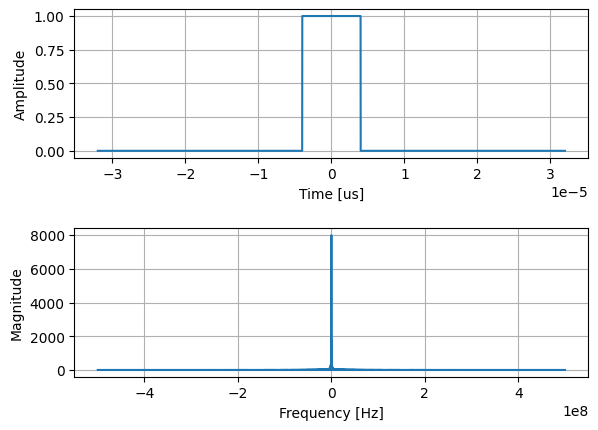

In [4]:
T = 8e-6  # Pulse Width [s]
fs = 1e9  # Sampling Frequency [Hz]
Ts = 1 / fs  # Sampling period [s]

t = np.arange(-4 * T, 4 * T, Ts)  # Time vector
st = np.where(np.abs(t) < T / 2, 1.0, 0.0)  # Signal in time domain

Sf = np.fft.fftshift(np.fft.fft(st))  # Signal in frequency domain
f = np.fft.fftshift(np.fft.fftfreq(len(t), Ts))  # Frequency vector

fig, axs = plt.subplots(2, 1)
fig.tight_layout(pad=3.0)
axs = axs.flatten()

axs[0].plot(t, st)  # Time in us
axs[0].set_xlabel("Time [us]")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

axs[1].plot(f, np.abs(Sf))  # Frequency in kHz
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Magnitude")
axs[1].grid()

plt.show()

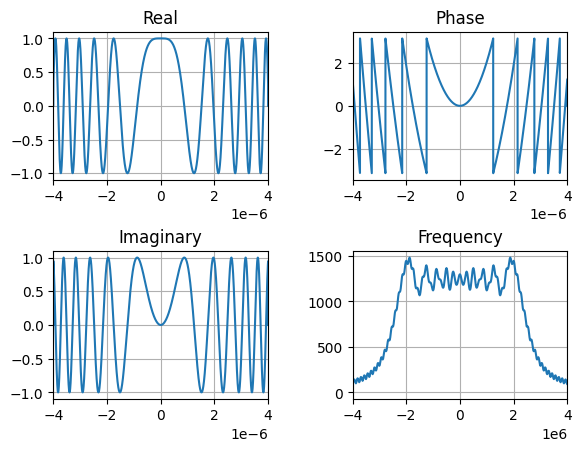

In [5]:
K = 65e10
st_fm = st * np.exp(1j * np.pi * K * t**2)  # FM signal in time
Sf_fm = np.fft.fftshift(np.fft.fft(st_fm))

fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=3.0)
axs = axs.flatten()

axs[0].set_title("Real")
axs[0].plot(t, np.real(st_fm))
axs[0].set_xlim(-4e-6, 4e-6)


axs[1].set_title("Phase")
axs[1].plot(t, np.angle(st_fm))
axs[1].set_xlim(-4e-6, 4e-6)

axs[2].set_title("Imaginary")
axs[2].plot(t, np.imag(st_fm))
axs[2].set_xlim(-4e-6, 4e-6)

axs[3].set_title("Frequency")
axs[3].plot(f, np.abs(Sf_fm))
axs[3].set_xlim(-4e6, 4e6)

for ax in axs:
    ax.grid()

plt.show()

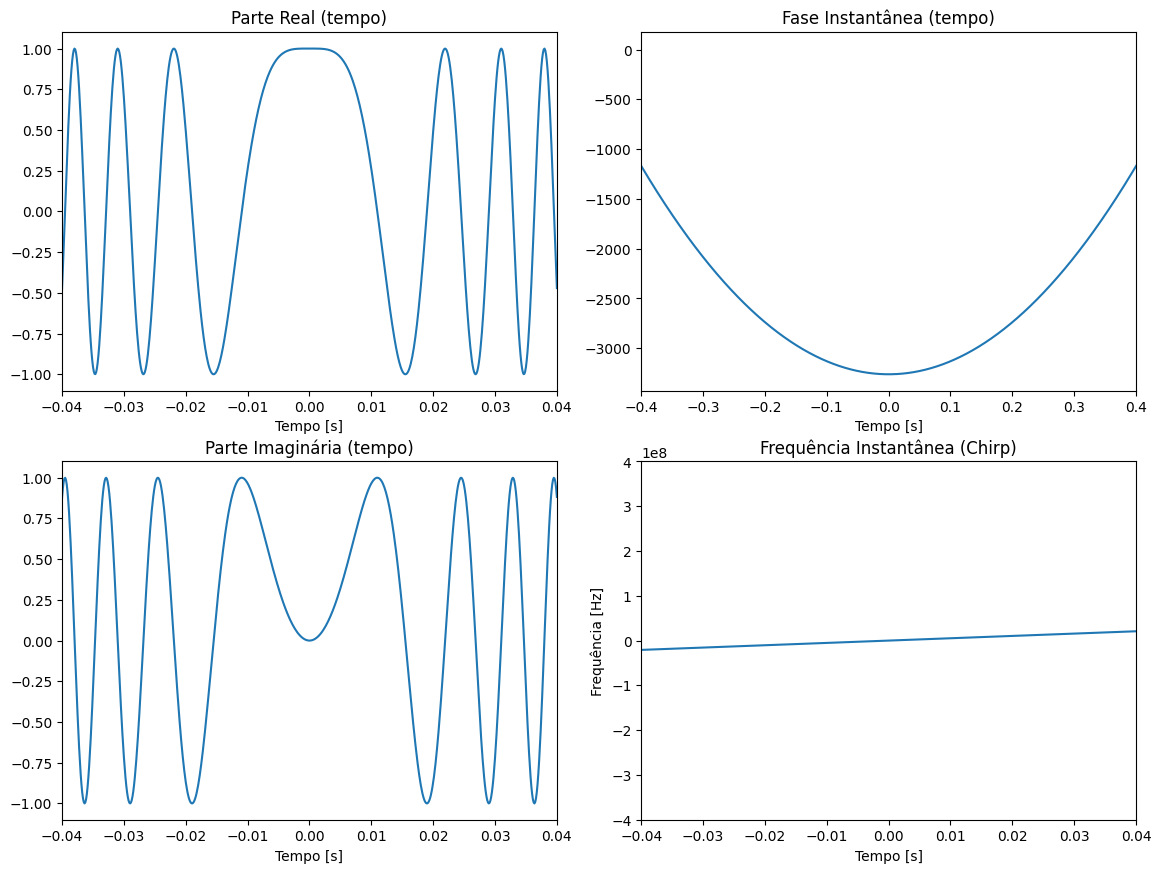

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

# ---------------------------
# Parâmetros do sinal
# ---------------------------
T = 8e-6  # largura do pulso (s)
K = 65e12  # taxa de chirp (Hz/s)
fs = 1e9  # frequência de amostragem (Hz)
Ts = 1 / fs  # período de amostragem

# Eixo temporal (8T para enxergar melhor a janela)
t = np.arange(-4 * T, 4 * T, Ts)

# ---------------------------
# Sinal no tempo (chirp retangular)
# ---------------------------
rect = np.where(np.abs(t) <= T / 2, 1.0, 0.0)  # janela retangular
s_t = rect * np.exp(1j * np.pi * K * t**2)

# ---------------------------
# FFT e eixo de frequência
# ---------------------------
Sf = np.fft.fftshift(np.fft.fft(s_t))
f = np.fft.fftshift(np.fft.fftfreq(len(t), Ts))

# ---------------------------
# Frequência instantânea
# ---------------------------
phi = np.unwrap(np.angle(s_t))  # fase contínua
f_inst = np.gradient(phi, Ts) / (2 * np.pi)  # Hz

# ---------------------------
# Plots
# ---------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.tight_layout(pad=3.0)
axs = axs.flatten()

# Parte real
axs[0].plot(t / T, np.real(s_t))
axs[0].set_title("Parte Real (tempo)")
axs[0].set_xlim(-4e-2, 4e-2)
axs[0].set_xlabel("Tempo [s]")


# Fase no tempo
axs[1].plot(t / T, phi)
axs[1].set_title("Fase Instantânea (tempo)")
axs[1].set_xlim(-4e-1, 4e-1)
axs[1].set_xlabel("Tempo [s]")

# Parte imaginária
axs[2].plot(t / T, np.imag(s_t))
axs[2].set_title("Parte Imaginária (tempo)")
axs[2].set_xlim(-4e-2, 4e-2)
axs[2].set_xlabel("Tempo [s]")


# Frequência instantânea
axs[3].plot(t / T, f_inst)
axs[3].set_title("Frequência Instantânea (Chirp)")
axs[3].set_xlim(-4e-2, 4e-2)
axs[3].set_ylim(-4e8, 4e8)
axs[3].set_xlabel("Tempo [s]")
axs[3].set_ylabel("Frequência [Hz]")

plt.show()

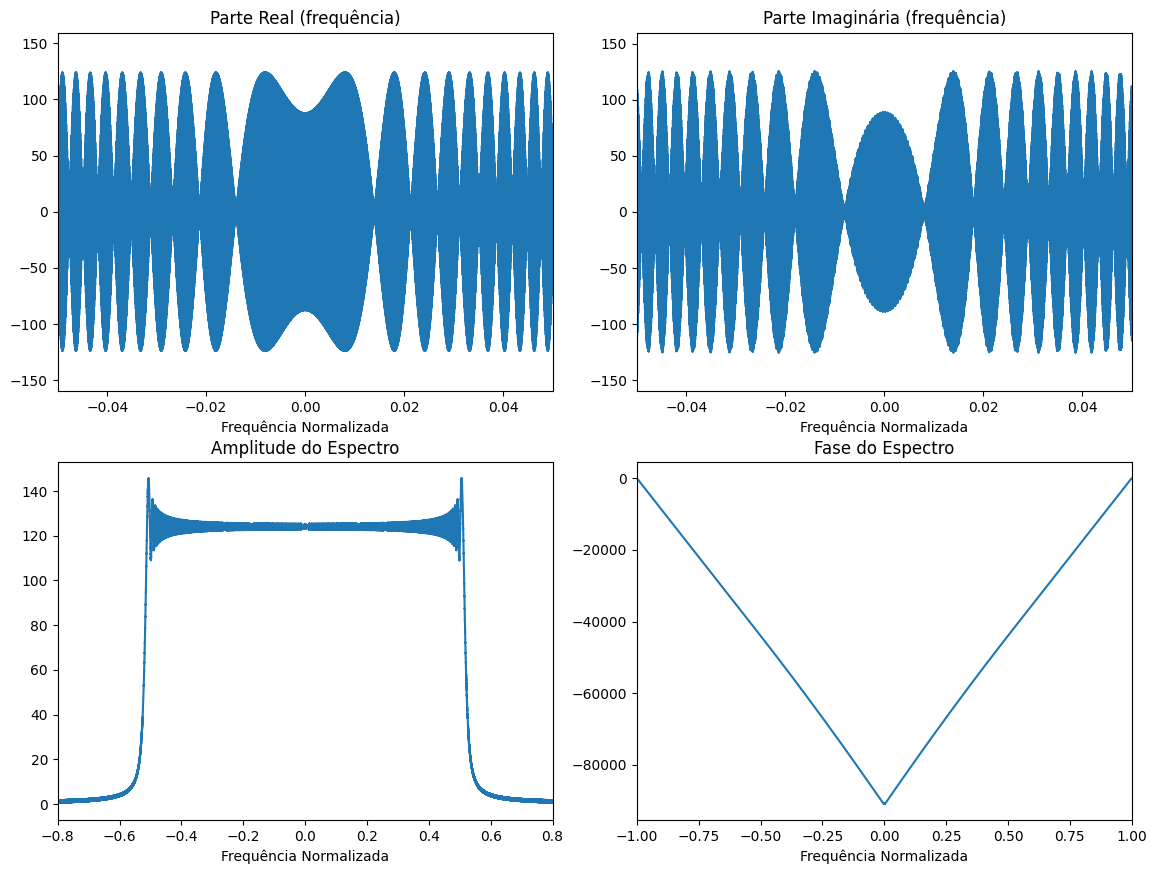

In [75]:
# ---------------------------
# Plots
# ---------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.tight_layout(pad=3.0)
axs = axs.flatten()
# Parte real
axs[0].plot(f / np.max(np.abs(f)), np.real(Sf))  # frequência normalizada
axs[0].set_title("Parte Real (frequência)")
normalized_f = f / fs
axs[0].set_xlim(-0.05, 0.05)
axs[0].set_xlabel("Frequência Normalizada")

# Parte imaginária
axs[1].plot(f / np.max(np.abs(f)), np.imag(Sf))  # frequência normalizada
axs[1].set_title("Parte Imaginária (frequência)")
axs[1].set_xlim(-0.05, 0.05)
axs[1].set_xlabel("Frequência Normalizada")

# Amplitude
axs[2].plot(f / np.max(np.abs(f)), np.abs(Sf))  # frequência normalizada
axs[2].set_title("Amplitude do Espectro")
axs[2].set_xlim(-8e-1, 8e-1)
axs[2].set_xlabel("Frequência Normalizada")

# Fase
axs[3].plot(f / np.max(np.abs(f)), np.unwrap(np.angle(Sf)))  # frequência normalizada
axs[3].set_title("Fase do Espectro")
axs[3].set_xlim(-1, 1)
axs[3].set_xlabel("Frequência Normalizada")

plt.show()

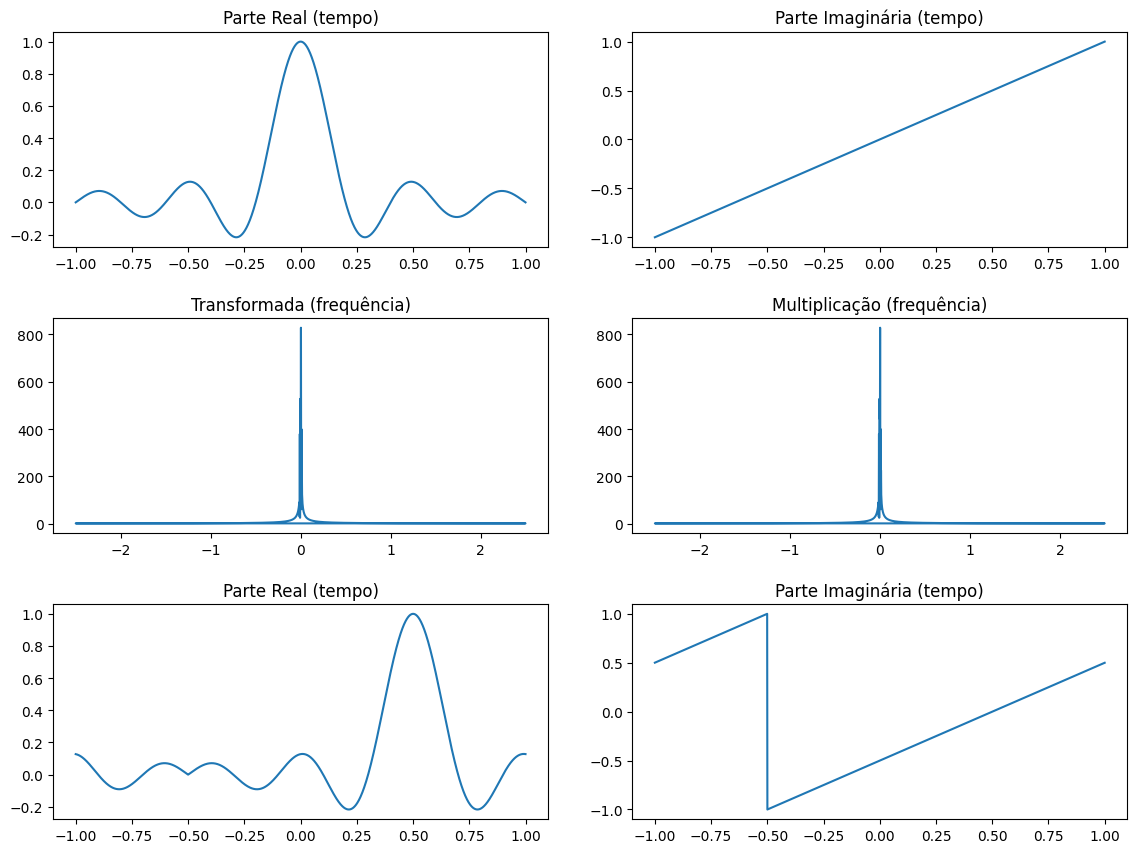

In [7]:



# Rampa de fase linear no domínio da frequência
fs = 5
Ts = 1 / fs
# gerar sinal de entrada
t  = np.linspace(-1, 1, 2000)
s = np.sinc(5 * t) + 1j * t  # rampa imaginária
Sf = np.fft.fft(s)
k = 500  # número de amostras de deslocamento
ramp = 2 * np.pi * k * np.arange(len(Sf)) / len(Sf)
S_ramp = Sf * np.exp(-1j * ramp)
s_ramp = np.fft.ifft(S_ramp)

f = np.fft.fftfreq(len(s), Ts)

fig, axs = plt.subplots(3, 2, figsize=(12, 9))
fig.tight_layout(pad=3.0)
axs = axs.flatten()


axs[0].set_title("Parte Real (tempo)")
axs[0].plot(t,np.real(s))
axs[1].set_title("Parte Imaginária (tempo)")
axs[1].plot(t,np.imag(s))
axs[2].set_title("Transformada (frequência)")
axs[2].plot(f,np.abs(Sf))
axs[3].set_title("Multiplicação (frequência)")
axs[3].plot(f,np.abs(S_ramp))
axs[4].set_title("Parte Real (tempo)")
axs[4].plot(t,np.real(s_ramp))
axs[5].set_title("Parte Imaginária (tempo)")
axs[5].plot(t,np.imag(s_ramp))


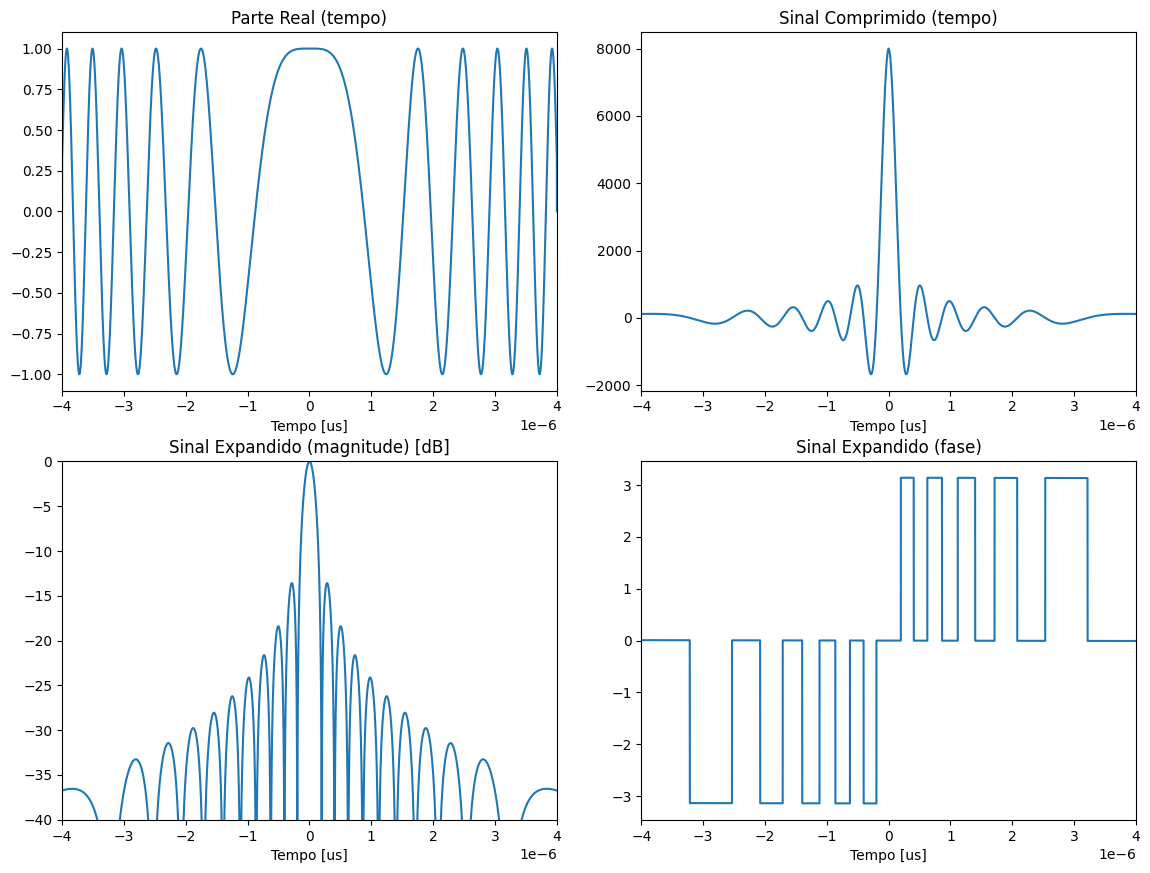

In [8]:


# ---------------------------
# Parâmetros do sinal
# ---------------------------
T = 8e-6  # largura do pulso (s)
K = 65e10  # taxa de chirp (Hz/s)
fs = 1e9  # frequência de amostragem (Hz)
Ts = 1 / fs  # período de amostragem

# Eixo temporal (8T para enxergar melhor a janela)
t = np.arange(-4 * T, 4 * T, Ts)

# ---------------------------
# Sinal no tempo (chirp retangular)
# ---------------------------
rect = np.where(np.abs(t) <= T / 2, 1.0, 0.0)  # janela retangular
s_t = rect * np.exp(1j * np.pi * K * t**2)

# ----------------------
# Filtro Casado
# ----------------------

h = np.conj(s_t[::-1])  # filtro casado (time-reversed conjugate)

# Aplicar o filtro casado
s_filtered = np.convolve(s_t, h, mode='same')

# ---------------------------
# FFT e eixo de frequência
# ---------------------------
Sf = np.fft.fftshift(np.fft.fft(s_filtered))
f = np.fft.fftshift(np.fft.fftfreq(len(t), Ts))

# --------------------------
# Padding no sinal da frequência
# ------------------------------


pad_width = len(Sf) // 2
Sf_padded = np.pad(Sf, (pad_width, pad_width), mode='constant', constant_values=0)

# Inversa e eixo temporal ajustado
s_expanded = np.fft.ifft(np.fft.ifftshift(Sf_padded))
t_expanded = np.linspace(t[0], t[-1], len(s_expanded))
# ---------------------------
# Plots
# ---------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.tight_layout(pad=3.0)
axs = axs.flatten()

# Parte real
axs[0].plot(t, np.real(s_t))
axs[0].set_title("Parte Real (tempo)")
axs[0].set_xlim(-4e-6, 4e-6)
axs[0].set_xlabel("Tempo [us]")

# Sinal comprimido
axs[1].plot(t, np.real(s_filtered))
axs[1].set_title("Sinal Comprimido (tempo)")
axs[1].set_xlim(-4e-6, 4e-6)
axs[1].set_xlabel("Tempo [us]")


# sinal expandido
def mag_db(x):
    x = np.abs(x)
    x = x / np.max(x)
    return 20 * np.log10(x + 1e-12)  # evita log(0)

axs[2].plot(t_expanded, mag_db(s_expanded))
axs[2].set_title("Sinal Expandido (magnitude) [dB]")
axs[2].set_xlim(-4e-6, 4e-6)
axs[2].set_ylim(-40, 0)
axs[2].set_xlabel("Tempo [us]")

axs[3].plot(t_expanded, np.angle(s_expanded))
axs[3].set_title("Sinal Expandido (fase)")
axs[3].set_xlim(-4e-6, 4e-6)
axs[3].set_xlabel("Tempo [us]")



plt.show()

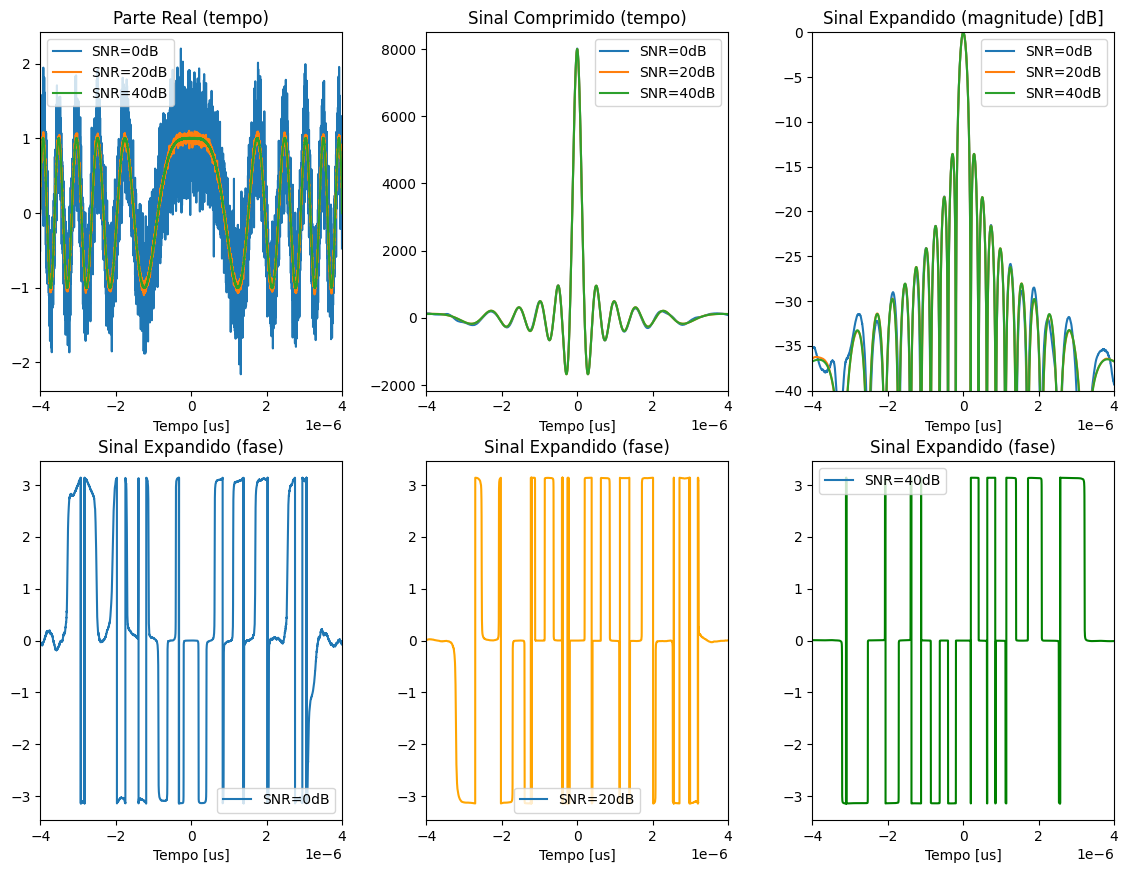

In [15]:
SNRs = [0, 20, 40]  # em dB

fig, axs = plt.subplots(2, 3, figsize=(12, 9))
fig.tight_layout(pad=3.0)
axs = axs.flatten()
index = 0
for snr_db in SNRs:
    
    # Calcula potência do sinal e do ruído
    signal_power = np.mean(np.abs(s_t)**2)
    snr_linear = 10**(snr_db / 10)
    noise_power = signal_power / snr_linear

    # Gera ruído
    noise = np.random.normal(0, np.sqrt(noise_power), s_t.shape)
    s_noisy = s_t + noise

    # Filtragem
    s_filtered = np.convolve(s_noisy, h, mode='same')

    # FFT e padding
    Sf = np.fft.fftshift(np.fft.fft(s_filtered))
    pad_width = len(Sf) // 2
    Sf_padded = np.pad(Sf, (pad_width, pad_width), mode='constant', constant_values=0)
    s_expanded = np.fft.ifft(np.fft.ifftshift(Sf_padded))
    t_expanded = np.linspace(t[0], t[-1], len(s_expanded))

    # Plots
    axs[0].plot(t, np.real(s_noisy), label=f"SNR={snr_db}dB")
    axs[1].plot(t, np.real(s_filtered), label=f"SNR={snr_db}dB")
    axs[2].plot(t_expanded, mag_db(s_expanded), label=f"SNR={snr_db}dB")
    axs[3 + index].plot(t_expanded, np.angle(s_expanded), label=f"SNR={snr_db}dB")
    index += 1

# Ajusta títulos e legendas
axs[0].set_title("Parte Real (tempo)")
axs[0].set_xlim(-4e-6, 4e-6)
axs[0].set_xlabel("Tempo [us]")
axs[0].legend()

axs[1].set_title("Sinal Comprimido (tempo)")
axs[1].set_xlim(-4e-6, 4e-6)
axs[1].set_xlabel("Tempo [us]")
axs[1].legend()

axs[2].set_title("Sinal Expandido (magnitude) [dB]")
axs[2].set_xlim(-4e-6, 4e-6)
axs[2].set_ylim(-40, 0)
axs[2].set_xlabel("Tempo [us]")
axs[2].legend()

axs[3].set_title("Sinal Expandido (fase)")
axs[3].set_xlim(-4e-6, 4e-6)
axs[3].set_xlabel("Tempo [us]")
axs[3].legend()

axs[4].set_title("Sinal Expandido (fase)")
axs[4].set_xlim(-4e-6, 4e-6)
axs[4].set_xlabel("Tempo [us]")
axs[4].legend()
for line in axs[4].lines:
    line.set_color('orange')
for legend in axs[4].get_legend_handles_labels()[0]:
    legend.set_color('orange')

axs[5].set_title("Sinal Expandido (fase)")
axs[5].set_xlim(-4e-6, 4e-6)
axs[5].set_xlabel("Tempo [us]")
axs[5].legend()
for line in axs[5].lines:
    line.set_color('green')
for legend in axs[5].get_legend_handles_labels()[0]:
    legend.set_color('green')

plt.show()
